In [1]:
import numpy as np
import pandas as pd

In [2]:
df= pd.read_csv('athlete_events.csv')
region_df= pd.read_csv('noc_regions.csv')

In [3]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
region_df.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [5]:
df.shape

(271116, 15)

### Filtering Winter olympics Data

In [6]:
df= df[df['Season']== 'Summer']

In [7]:
df.shape

(222552, 15)

In [8]:
df.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


### Extracting country name

In [9]:
df= df.merge(region_df, on='NOC', how='left')

In [10]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN


In [11]:
df['region'].unique()

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan',
       'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco',
       'Israel', 'Uruguay', 'Sweden', 'Sri Lanka', 'Armenia',
       'Ivory Coast', 'Kenya', 'Ben

In [12]:
df['region'].unique().shape

(206,)

ignoring the historical issue and hence different country name

In [13]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [14]:
df.duplicated().sum()

1385

In [15]:
df.drop_duplicates(inplace= True)

In [16]:
df.duplicated().sum()

0

In [17]:
df['Medal'].value_counts()

Medal
Gold      11456
Bronze    11409
Silver    11212
Name: count, dtype: int64

### Label Encoding

In [18]:
pd.get_dummies(df['Medal']).astype(int)

,Bronze,Gold,Silver
0,0,0,0
1,0,0,0
2,0,0,0
3,0,1,0
4,0,0,0
...,...,...,...
222547,0,0,0
222548,0,0,0
222549,0,0,0
222550,0,0,0


Concatinging with original dataframe

In [19]:
df.shape

(221167, 17)

In [20]:
df= pd.concat([df, pd.get_dummies(df['Medal'], dtype=int)], axis=1)
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


Now we have three extra columns, gold silver bronze 

In [21]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


In [22]:
df.groupby('NOC').sum()[['Gold', 'Silver', 'Bronze']]

,Gold,Silver,Bronze
NOC,,,
AFG,0,0,2
AHO,0,1,0
ALB,0,0,0
ALG,5,4,8
AND,0,0,0
...,...,...,...
YEM,0,0,0
YMD,0,0,0
YUG,130,161,92


In [23]:
df.groupby('NOC').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()

,NOC,Gold,Silver,Bronze
0,USA,2472,1333,1197
1,URS,832,635,596
2,GBR,635,729,620
3,GER,592,538,649
4,ITA,518,474,454
...,...,...,...,...
225,AHO,0,1,0
226,LBR,0,0,0
227,LCA,0,0,0
228,LES,0,0,0


There is discrepency in medal count number, it is because so in team events, it is counting contribution of all the individual players, while it should have been counted only once per team.  
Therefore, we will remove those repeatations

In [24]:
medal_tally= df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])

In [25]:
medal_tally.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


In [26]:
medal_tally= medal_tally.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()

In [27]:
medal_tally

,region,Gold,Silver,Bronze
0,USA,1035,802,708
1,Russia,592,498,487
2,Germany,444,457,491
3,UK,278,317,300
4,France,234,256,287
...,...,...,...,...
200,Lesotho,0,0,0
201,Albania,0,0,0
202,Libya,0,0,0
203,Liechtenstein,0,0,0


There is little discrpencies as due to historical reasons, country names might have changed over the years and hence their count. For India, the dataset is perfect

In [28]:
medal_tally['total']= medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']

In [29]:
medal_tally

,region,Gold,Silver,Bronze,total
0,USA,1035,802,708,2545
1,Russia,592,498,487,1577
2,Germany,444,457,491,1392
3,UK,278,317,300,895
4,France,234,256,287,777
...,...,...,...,...,...
200,Lesotho,0,0,0,0
201,Albania,0,0,0,0
202,Libya,0,0,0,0
203,Liechtenstein,0,0,0,0


In [30]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


In [31]:
years= df['Year'].unique().tolist()
years.sort()

In [32]:
years.insert(0,'Overall')
years

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [33]:
country= df['region'].unique().tolist()
country.sort()

TypeError: '<' not supported between instances of 'float' and 'str'

There are some NA values also present, so we will drop those columns

In [34]:
country= np.unique(df['region'].dropna().values).tolist()

In [35]:
country.sort()
country

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guin

In [36]:
country.insert(0,'Overall')
country

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [37]:
def fetch_medal_tally(df, year,country):
    medal_df= df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])
    flag=0
    if year=='Overall' and country=='Overall':
        temp_df= medal_df
    elif year=='Overall' and country!='Overall':
        flag=1
        temp_df= medal_df[medal_df['region']==country]
    elif year!='Overall' and country=='Overall':
        temp_df= medal_df[medal_df['Year']==int(year)]
    elif year!='Overall' and country!='Overall':
        temp_df=  medal_df[(medal_df['Year']==int(year)) & (medal_df['region']==country)] 

    if flag==0:
        x= temp_df.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()
    else:
        x= temp_df.groupby('Year').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Year').reset_index()
    
    x['total']= x['Gold'] + x['Silver'] + x['Bronze']

    print(x)

In [38]:
medal_df= medal_tally= df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])

medal_df

In [42]:
medal_df['region']=='India'

0         False
1         False
2         False
3         False
4         False
          ...  
222528    False
222530    False
222536    False
222537    False
222541    False
Name: region, Length: 105636, dtype: bool

Seeing some examples

In [43]:
fetch_medal_tally(year='Overall', country='Overall')

TypeError: fetch_medal_tally() missing 1 required positional argument: 'df'

In [44]:
fetch_medal_tally(year='Overall', country='India')

TypeError: fetch_medal_tally() missing 1 required positional argument: 'df'

In [45]:
fetch_medal_tally(year='2016', country='Overall')

TypeError: fetch_medal_tally() missing 1 required positional argument: 'df'

In [46]:
fetch_medal_tally(year='2016', country='India')

TypeError: fetch_medal_tally() missing 1 required positional argument: 'df'

## Overall Analysis

1. No. of editions
2. No. of cities
3. No. of events/sports
4. No. of athletes
5. Participating Nations

In [47]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN,0,0,0
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN,0,0,0
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0


In [48]:
#no of editions
df['Year'].unique()

array([1992, 2012, 1920, 1900, 1932, 1952, 2000, 1996, 1912, 1924, 1948,
       2008, 2016, 2004, 1984, 1968, 1972, 1988, 1936, 1956, 1960, 1928,
       1976, 1980, 1964, 1906, 1904, 1908, 1896], dtype=int64)

In [49]:
df['Year'].unique().shape

(29,)

1906 doesn't regard as olympics, therefore we will subtract one

In [50]:
df['Year'].unique().shape[0]-1

28

In [51]:
# no of cities
df['City'].unique().shape

(23,)

In [52]:
# no of cities
df['City'].unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Los Angeles',
       'Helsinki', 'Sydney', 'Atlanta', 'Stockholm', 'Beijing',
       'Rio de Janeiro', 'Athina', 'Mexico City', 'Munich', 'Seoul',
       'Berlin', 'Melbourne', 'Roma', 'Amsterdam', 'Montreal', 'Moskva',
       'Tokyo', 'St. Louis'], dtype=object)

In [53]:
#no. of sports
df['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [54]:
df['Sport'].unique().shape

(52,)

In [55]:
# no of events
df['Event'].unique()

array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Athletics Women's 100 metres",
       "Athletics Women's 4 x 100 metres Relay",
       "Swimming Men's 400 metres Freestyle", "Badminton Men's Singles",
       "Sailing Women's Windsurfer",
       "Swimming Men's 200 metres Breaststroke",
       "Swimming Men's 400 metres Breaststroke",
       "Gymnastics Men's Individual All-Around",
       "Gymnastics Men's Team All-Around",
       "Gymnastics Men's Floor Exercise", "Gymnastics Men's Horse Vault",
       "Gymnastics Men's Parallel Bars",
       "Gymnastics Men's Horizontal Bar", "Gymnastics Men's Rings",
       "Gymnastics Men's Pommelled Horse", "Athletics Men's Shot Put",
       'Art Competitions Mixed Sculpturing, Unknown Event',
       "Handball Women's Handball",
       "Weightlifting Women's Super-Heavyweight",
       "Wrestling Men's Light-Heavyweight, Greco-Roman",
       "Gymnastics M

In [56]:
df['Event'].unique().shape

(651,)

In [57]:
#no of athletes
df['Name'].unique().shape

(116122,)

In [58]:
# no of partcipating nations
df['region'].unique().shape

(206,)

#### Plotting some graphs

In [59]:
#Participating nations over the 
df.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0


In [73]:
nations_over_time= df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('Year')

The above table showing, how many nations partcipated per year

In [74]:
nations_over_time

,Year,count
28,1896,12
22,1900,31
27,1904,14
26,1906,20
25,1908,22
24,1912,29
23,1920,29
21,1924,45
20,1928,46
19,1932,47


In [71]:
import plotly.express as px



In [66]:
fig= px.line(nations_over_time, x='Year', y='count')
fig.show()

ValueError: DataFrame constructor not properly called!

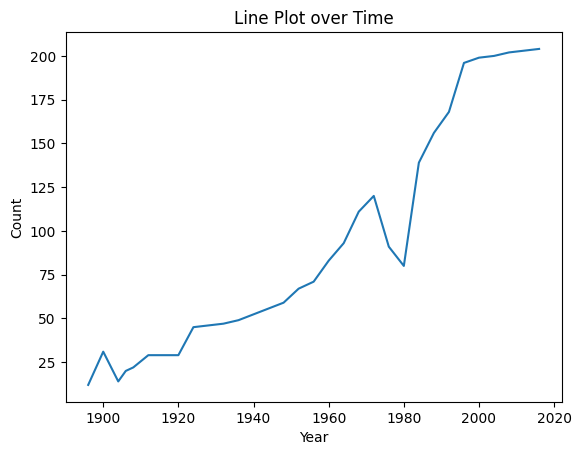

In [75]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named nations_over_time with columns 'Year' and 'count'
# Replace it with your actual DataFrame and column names

# Example data

# Plotting with Matplotlib
plt.plot(nations_over_time['Year'], nations_over_time['count'])
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Line Plot over Time')
plt.show()


### No of events over the years


In [77]:
df.drop_duplicates(['Year', 'Event'])['Year'].value_counts().reset_index().sort_values('Year')

,Year,count
28,1896,43
26,1900,90
25,1904,95
27,1906,74
23,1908,109
24,1912,107
14,1920,158
20,1924,131
22,1928,122
21,1932,131


### Athletes over time

In [78]:
athlete_over_time = helper.data_over_time(df, 'Name')
fig = px.line(events_over_time, x="Edition", y="Name")
st.title("Events over the years")
st.plotly_chart(fig)

NameError: name 'helper' is not defined

In [79]:
import seaborn as sns

<Axes: xlabel='Year', ylabel='Sport'>

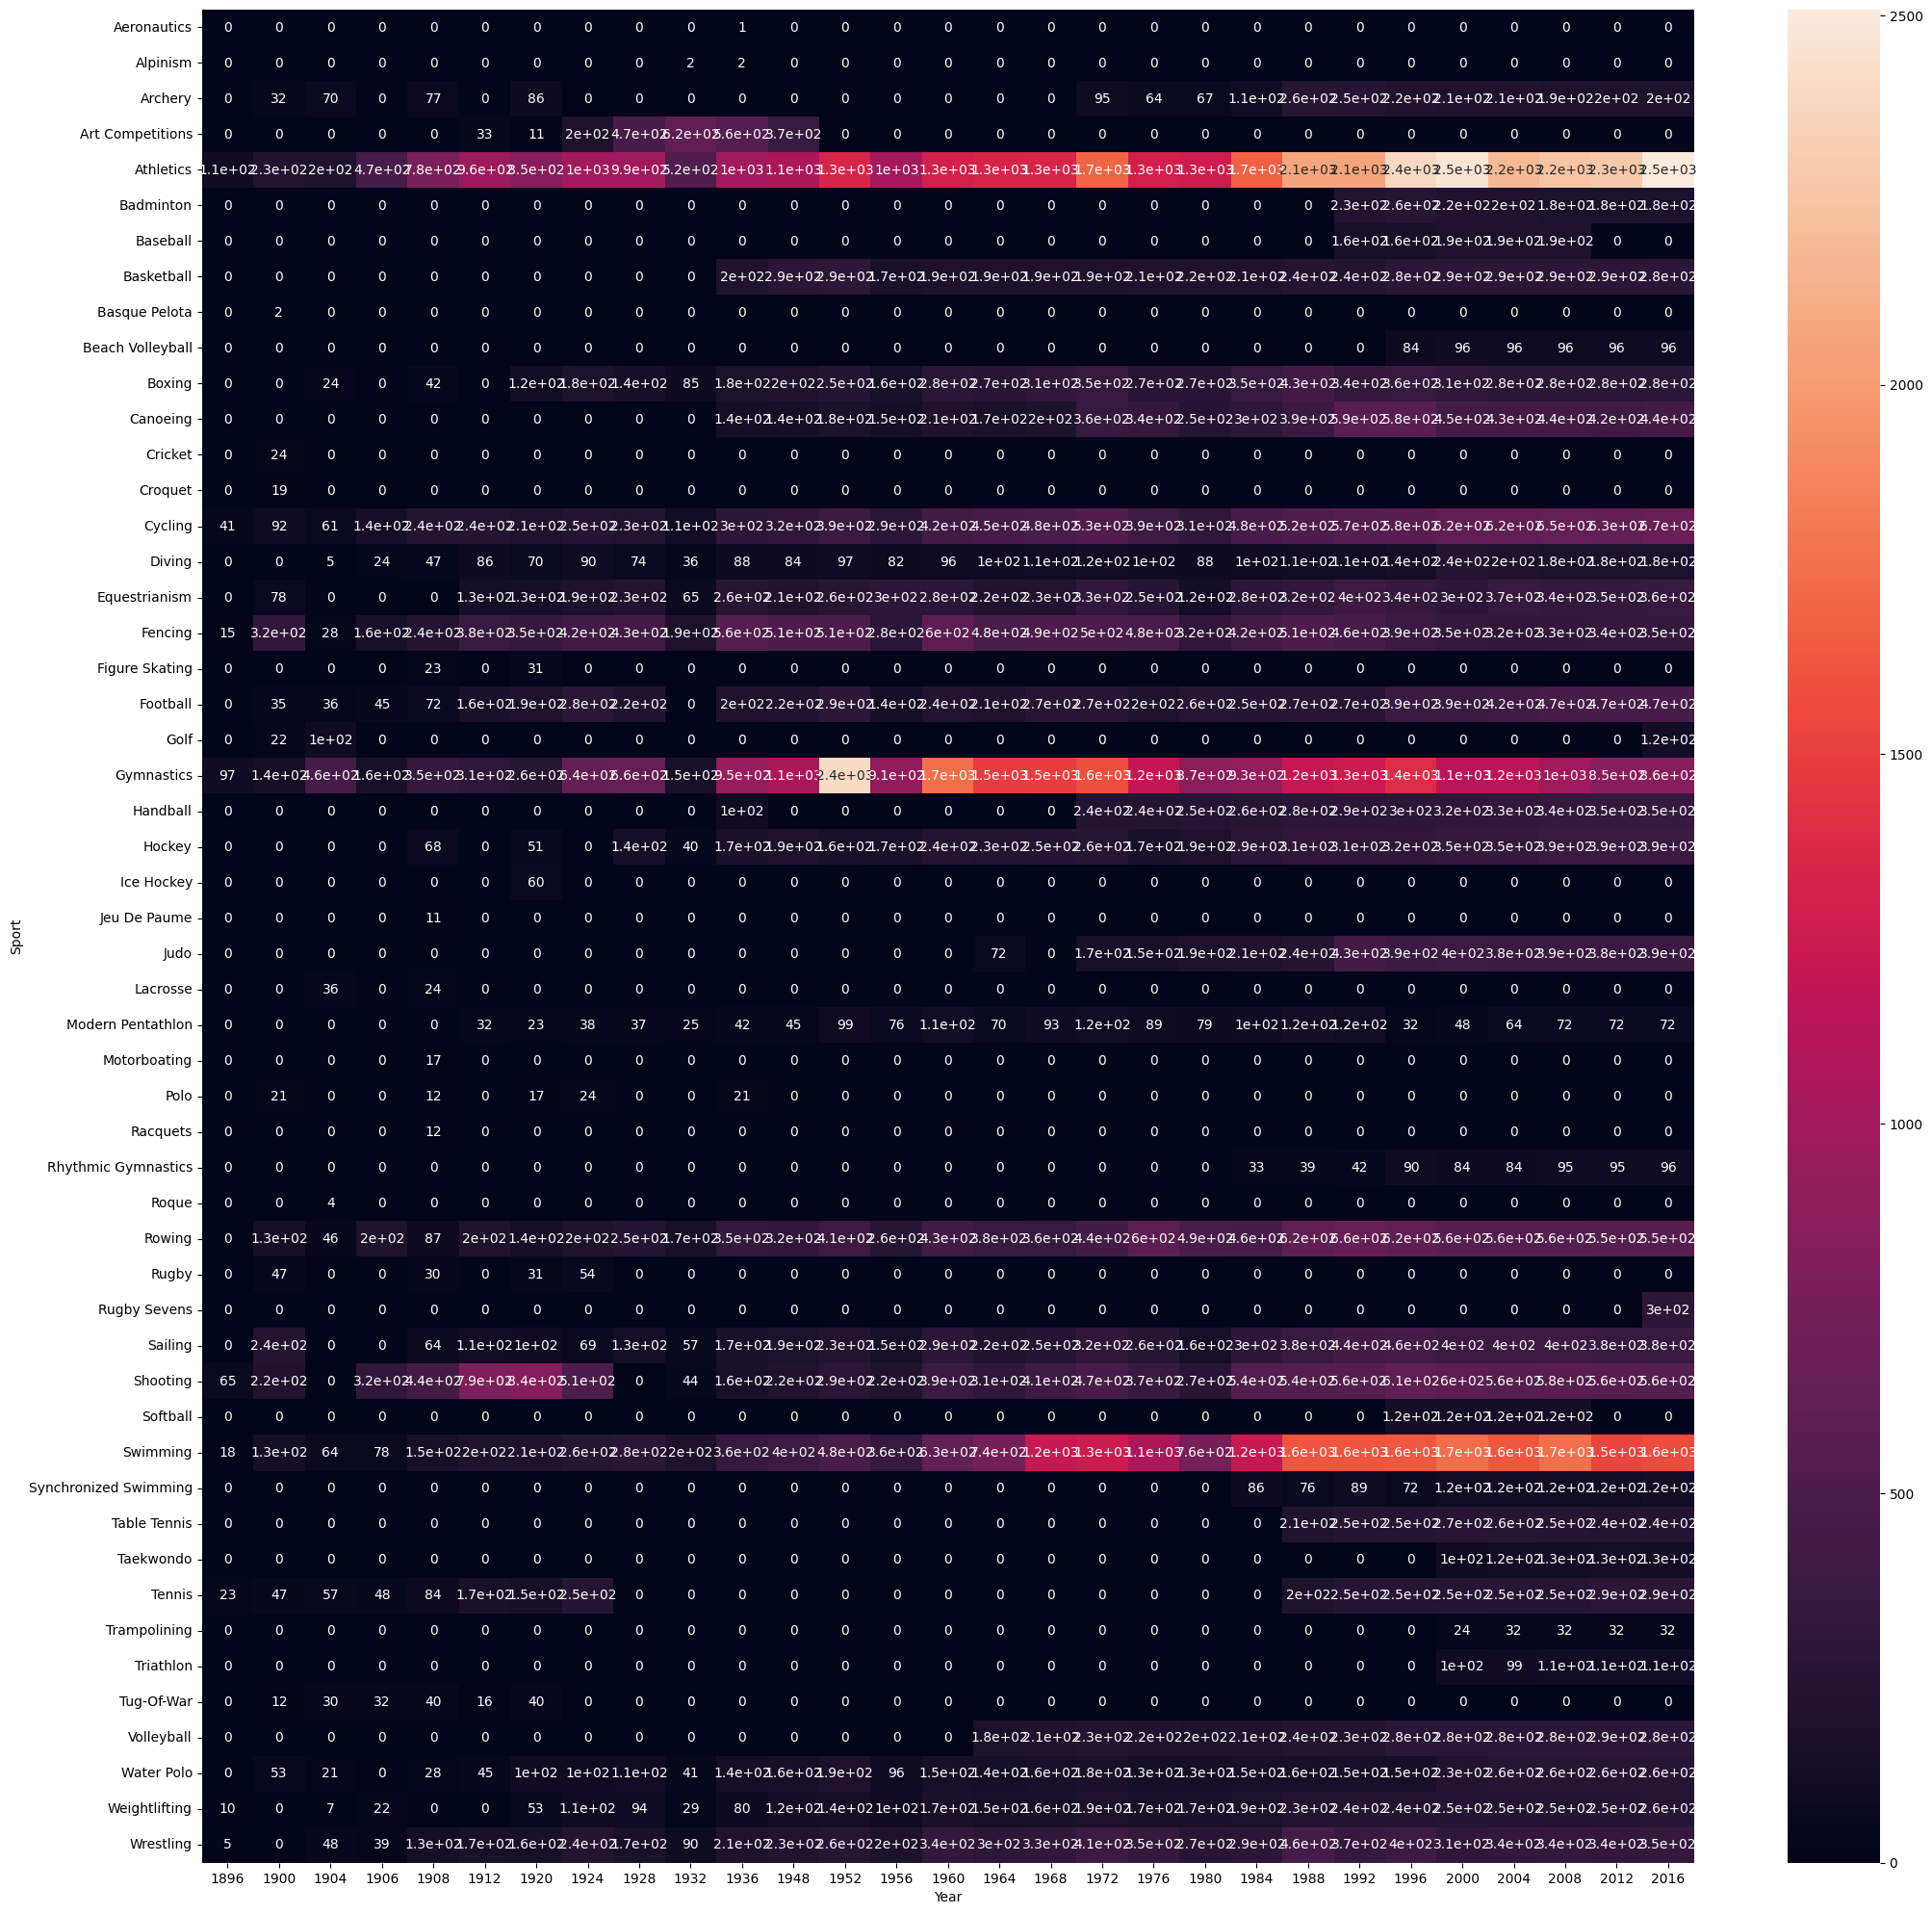

In [83]:
plt.figure(figsize=(25, 25))
sns.heatmap(df.pivot_table(index='Sport', columns='Year', values='Event', aggfunc='count').fillna(0).astype('int'), annot=True)


We getting information about which started when, and how many events increased per year

In [84]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN,0,0,0
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN,0,0,0
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0


In [86]:
x=df.drop_duplicates(['Year', 'Sport','Event'])

In [87]:
x.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


In [90]:
x.shape

(5239, 20)

In [93]:
x.pivot_table(index='Sport', columns='Year', values='Event', aggfunc='count')

Year,1896,1900,1904,1906,1908,1912,1920,1924,1928,1932,...,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016
Sport,,,,,,,,,,,,,,,,,,,,,
Aeronautics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alpinism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Archery,NaN,8.0,6.0,NaN,3.0,NaN,10.0,NaN,NaN,NaN,...,2.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
Art Competitions,NaN,NaN,NaN,NaN,NaN,5.0,5.0,5.0,13.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Athletics,12.0,23.0,24.0,21.0,26.0,30.0,29.0,27.0,27.0,29.0,...,38.0,41.0,42.0,43.0,44.0,46.0,46.0,47.0,47.0,47.0
Badminton,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,5.0,5.0,5.0,5.0,5.0,5.0
Baseball,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
Basketball,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
Basque Pelota,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now we will remove all NA values

In [94]:
x.pivot_table(index='Sport', columns='Year', values='Event', aggfunc='count').fillna(0).astype('int')

Year,1896,1900,1904,1906,1908,1912,1920,1924,1928,1932,...,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016
Sport,,,,,,,,,,,,,,,,,,,,,
Aeronautics,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alpinism,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Archery,0,8,6,0,3,0,10,0,0,0,...,2,2,4,4,4,4,4,4,4,4
Art Competitions,0,0,0,0,0,5,5,5,13,13,...,0,0,0,0,0,0,0,0,0,0
Athletics,12,23,24,21,26,30,29,27,27,29,...,38,41,42,43,44,46,46,47,47,47
Badminton,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4,5,5,5,5,5,5
Baseball,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,0,0
Basketball,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
Basque Pelota,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='Year', ylabel='Sport'>

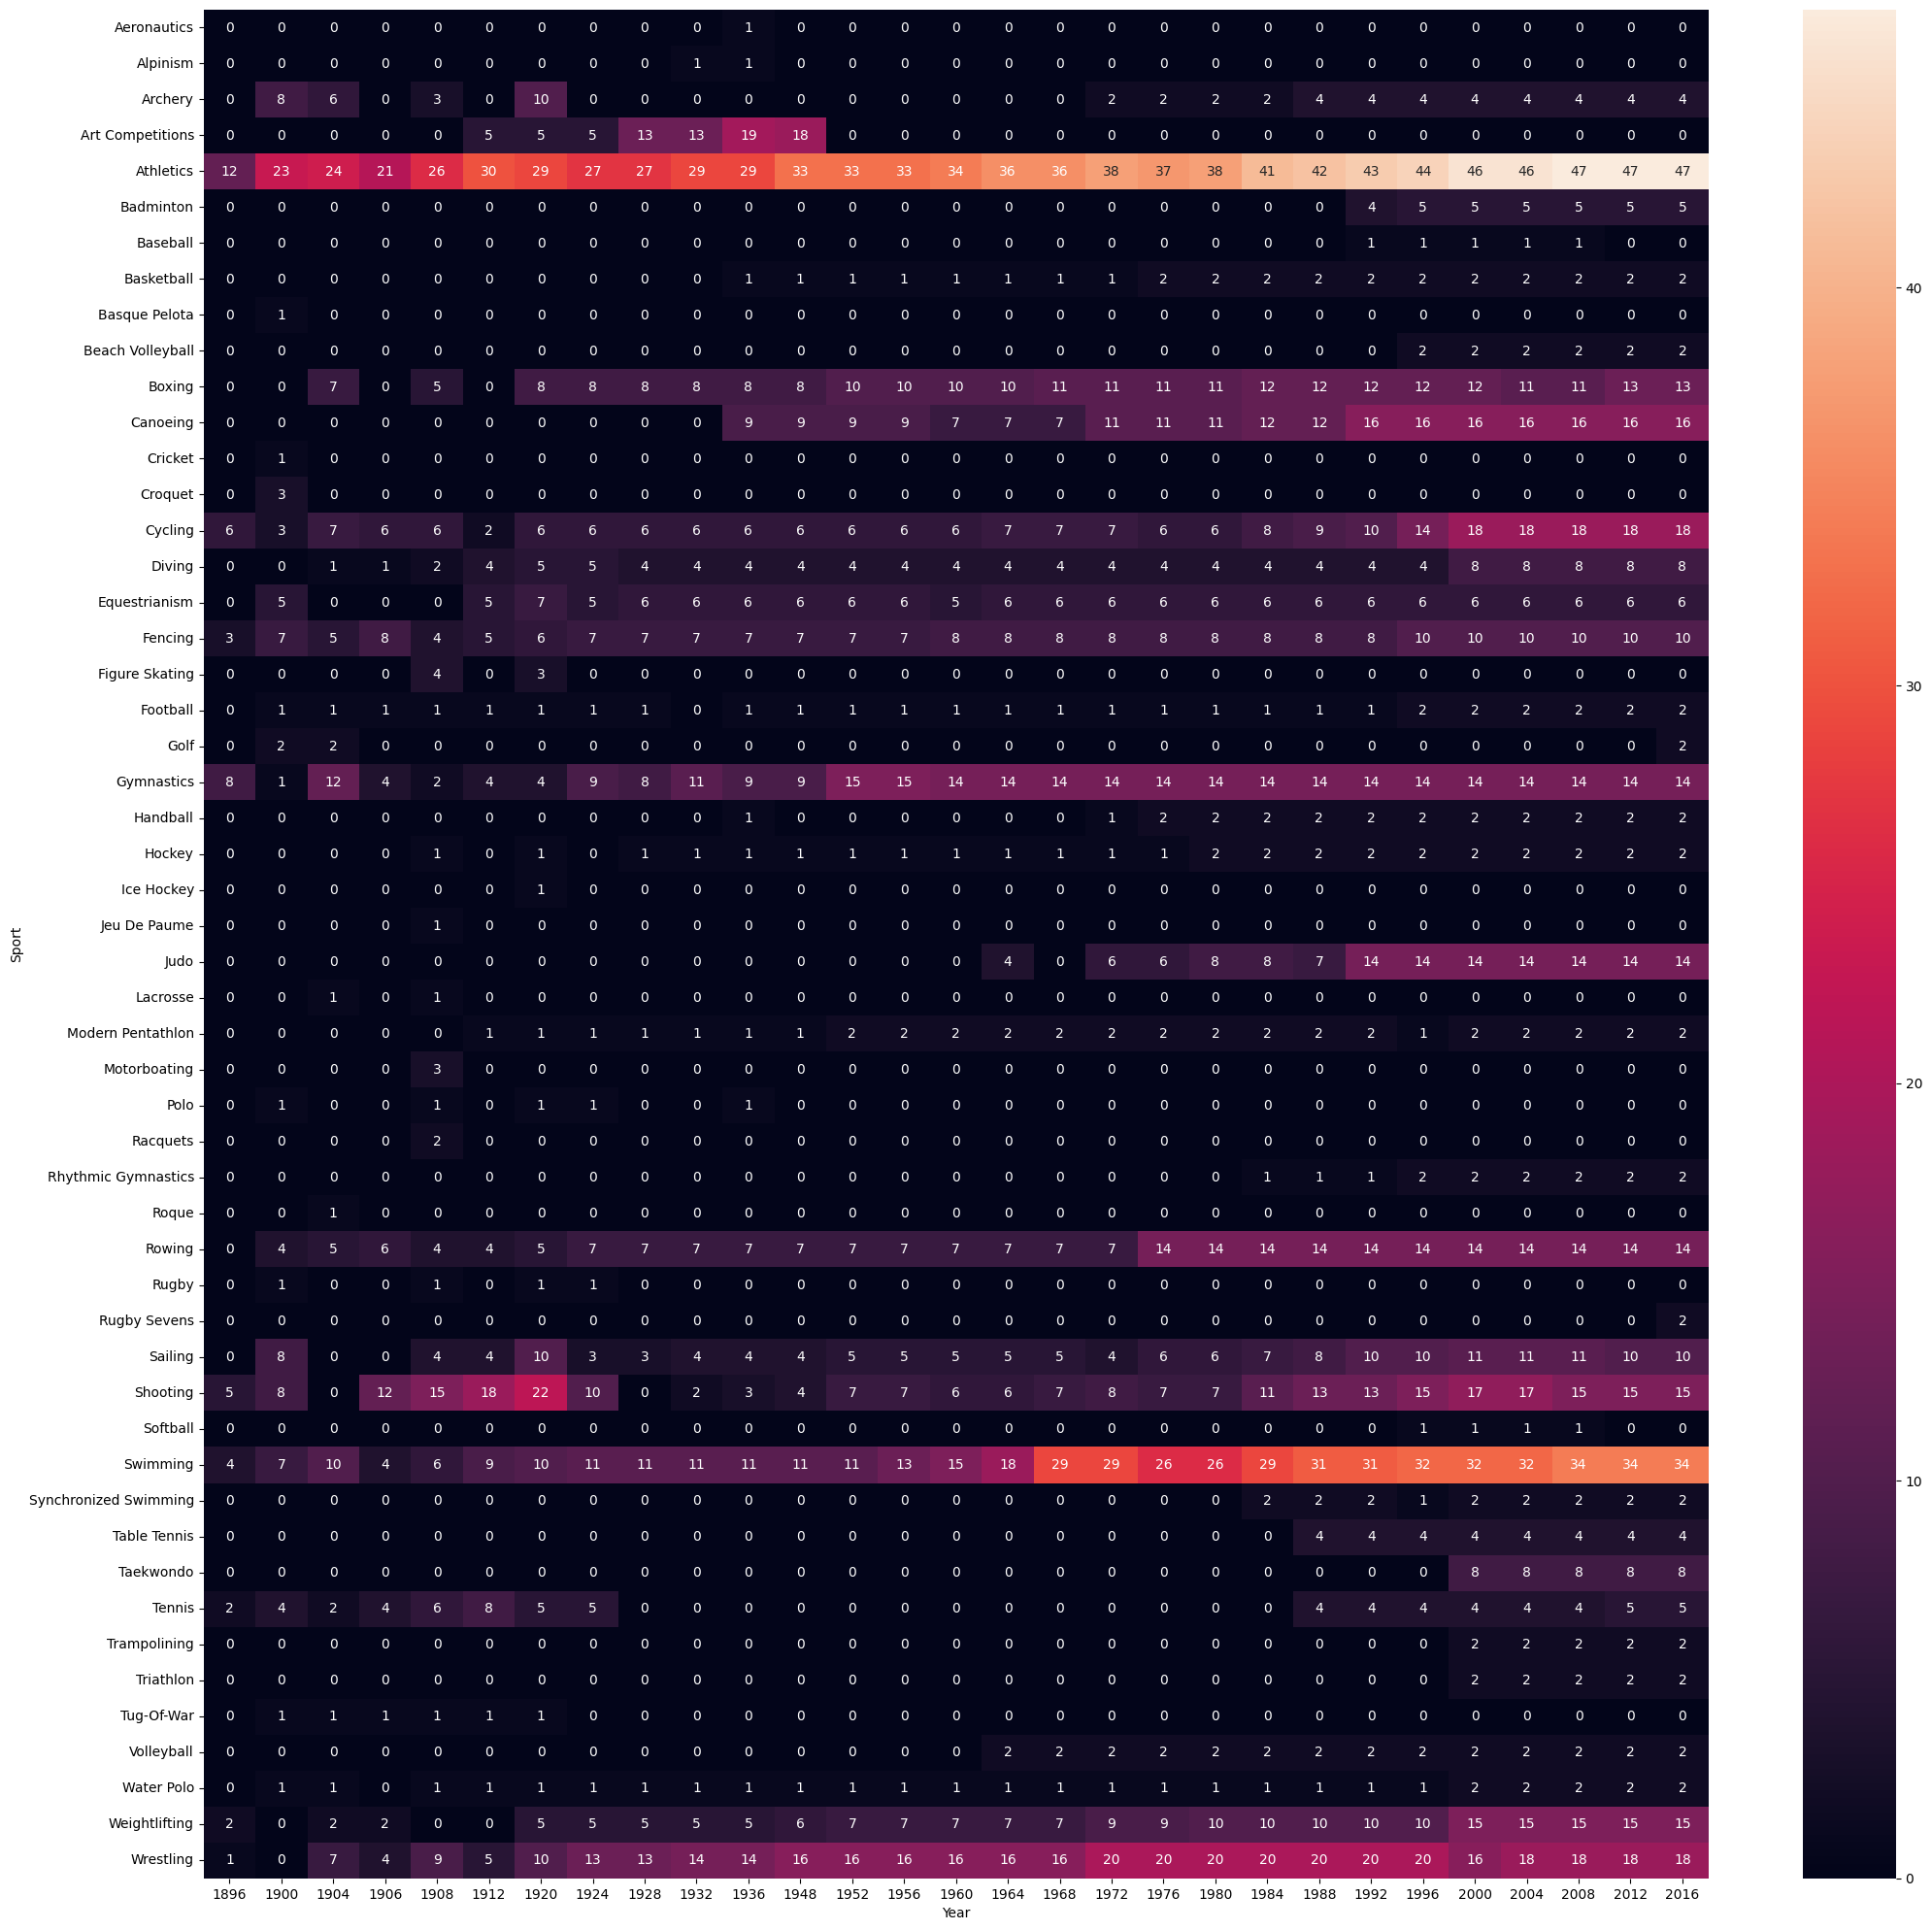

In [96]:
plt.figure(figsize=(25,25))
sns.heatmap(x.pivot_table(index='Sport', columns='Year', values='Event', aggfunc='count').fillna(0).astype('int'), annot= True)

### Most popular athlete

In [134]:
def most_successful(df,sport):
    temp_df= df.dropna(subset=["Medal"])

    if sport!= 'Overall':
        temp_df= temp_df[temp_df['Sport']==sport]
    x= temp_df['Name'].value_counts().reset_index().head(15).merge(df,how='left')[['Name', 'count', 'Sport', 'region']].drop_duplicates('Name')
    x.rename(columns={'count':'Medals'}, inplace=True)
    return x

    #reset_index makes it dataframe
    
    

In [135]:
most_successful(df,'Overall')

,Name,Medals,Sport,region
0,"Michael Fred Phelps, II",28,Swimming,USA
30,Larysa Semenivna Latynina (Diriy-),18,Gymnastics,Russia
49,Nikolay Yefimovich Andrianov,15,Gymnastics,Russia
73,Borys Anfiyanovych Shakhlin,13,Gymnastics,Russia
97,Takashi Ono,13,Gymnastics,Japan
130,Edoardo Mangiarotti,13,Fencing,Italy
144,"Dara Grace Torres (-Hoffman, -Minas)",12,Swimming,USA
157,Aleksey Yuryevich Nemov,12,Gymnastics,Russia
178,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12,Swimming,USA
195,Birgit Fischer-Schmidt,12,Canoeing,Germany


In [136]:
most_successful(df,'Swimming')

,Name,Medals,Sport,region
0,"Michael Fred Phelps, II",28,Swimming,USA
30,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12,Swimming,USA
47,"Dara Grace Torres (-Hoffman, -Minas)",12,Swimming,USA
60,Ryan Steven Lochte,12,Swimming,USA
74,Natalie Anne Coughlin (-Hall),12,Swimming,USA
86,"Matthew Nicholas ""Matt"" Biondi",11,Swimming,USA
98,Mark Andrew Spitz,11,Swimming,USA
110,"Gary Wayne Hall, Jr.",10,Swimming,USA
120,Franziska van Almsick,10,Swimming,Germany
143,Shirley Frances Babashoff,9,Swimming,USA


In [130]:
most_successful(df,'Hockey')

,Name,Medals,Sport,region
0,"Luciana Paula ""Lucha"" Aymar",4,Hockey,Argentina
4,Udham Singh Kular,4,Hockey,India
8,Teun Floris de Nooijer,4,Hockey,Netherlands
13,Leslie Walter Claudius,4,Hockey,India
17,Naomi Frances van As,3,Hockey,Netherlands
20,"Mara de la Paz ""Maripi"" Hernndez Margalot",3,Hockey,Argentina
23,Andreas Keller,3,Hockey,Germany
26,Abdul Rashid,3,Athletics,Pakistan
32,"Mara Mercedes ""Mechi"" Margalot",3,Hockey,Argentina
35,Saeed Anwar,3,Hockey,Pakistan


## Country Wise Analysis
1. Countrywise medal tally per year(line plot)
2. What countries are good at heapmap
3. Most successful Athletes(top 10), country wise

In [137]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN,0,0,0
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN,0,0,0
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0


In [142]:
#no need for medal NA values for medal tally
temp_df= df.dropna(subset=['Medal'])

In [144]:
#keeping only one medal in case of team sport
temp_df.drop_duplicates(subset=['Team','NOC', 'Games', 'Year','City','Sport','Event','Medal'],inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_19024\4174997375.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [145]:
temp_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
12,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,NaN,1,0,0
13,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland,NaN,1,0,0
15,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland,NaN,1,0,0
16,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN,0,1,0


In [153]:
new_df= temp_df[temp_df['region']=='USA']
final_df= new_df.groupby('Year').count()['Medal'].reset_index()

In [155]:
fig=px.line(final_df, x="Year",y="Medal")
fig.show()

<Axes: xlabel='Year', ylabel='Sport'>

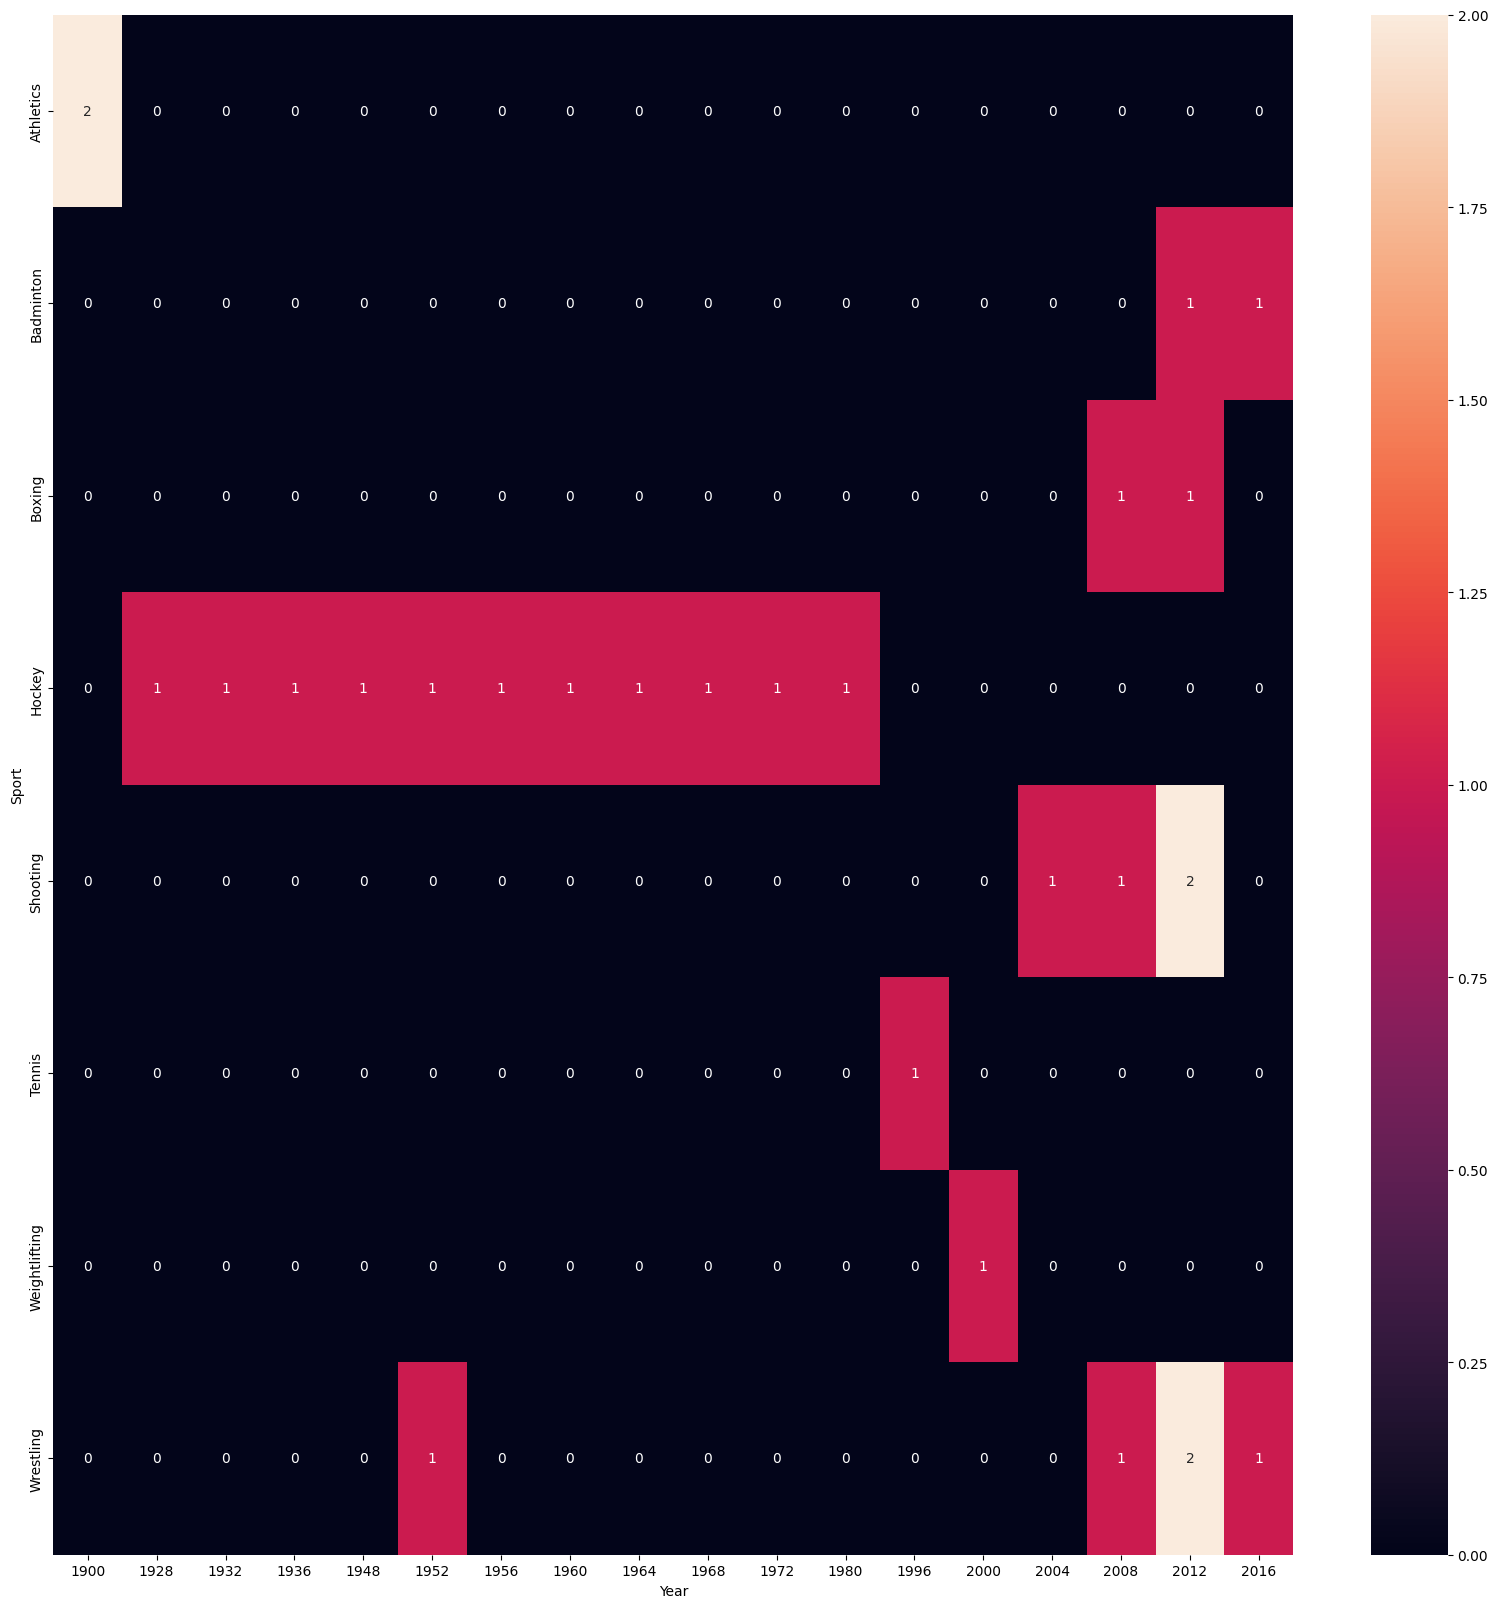

In [160]:
new_df= temp_df[temp_df['region']=='India']
plt.figure(figsize=(20,20))
sns.heatmap(new_df.pivot_table(index='Sport', columns='Year', values='Medal', aggfunc='count').fillna(0),annot=True)

<Axes: xlabel='Year', ylabel='Sport'>

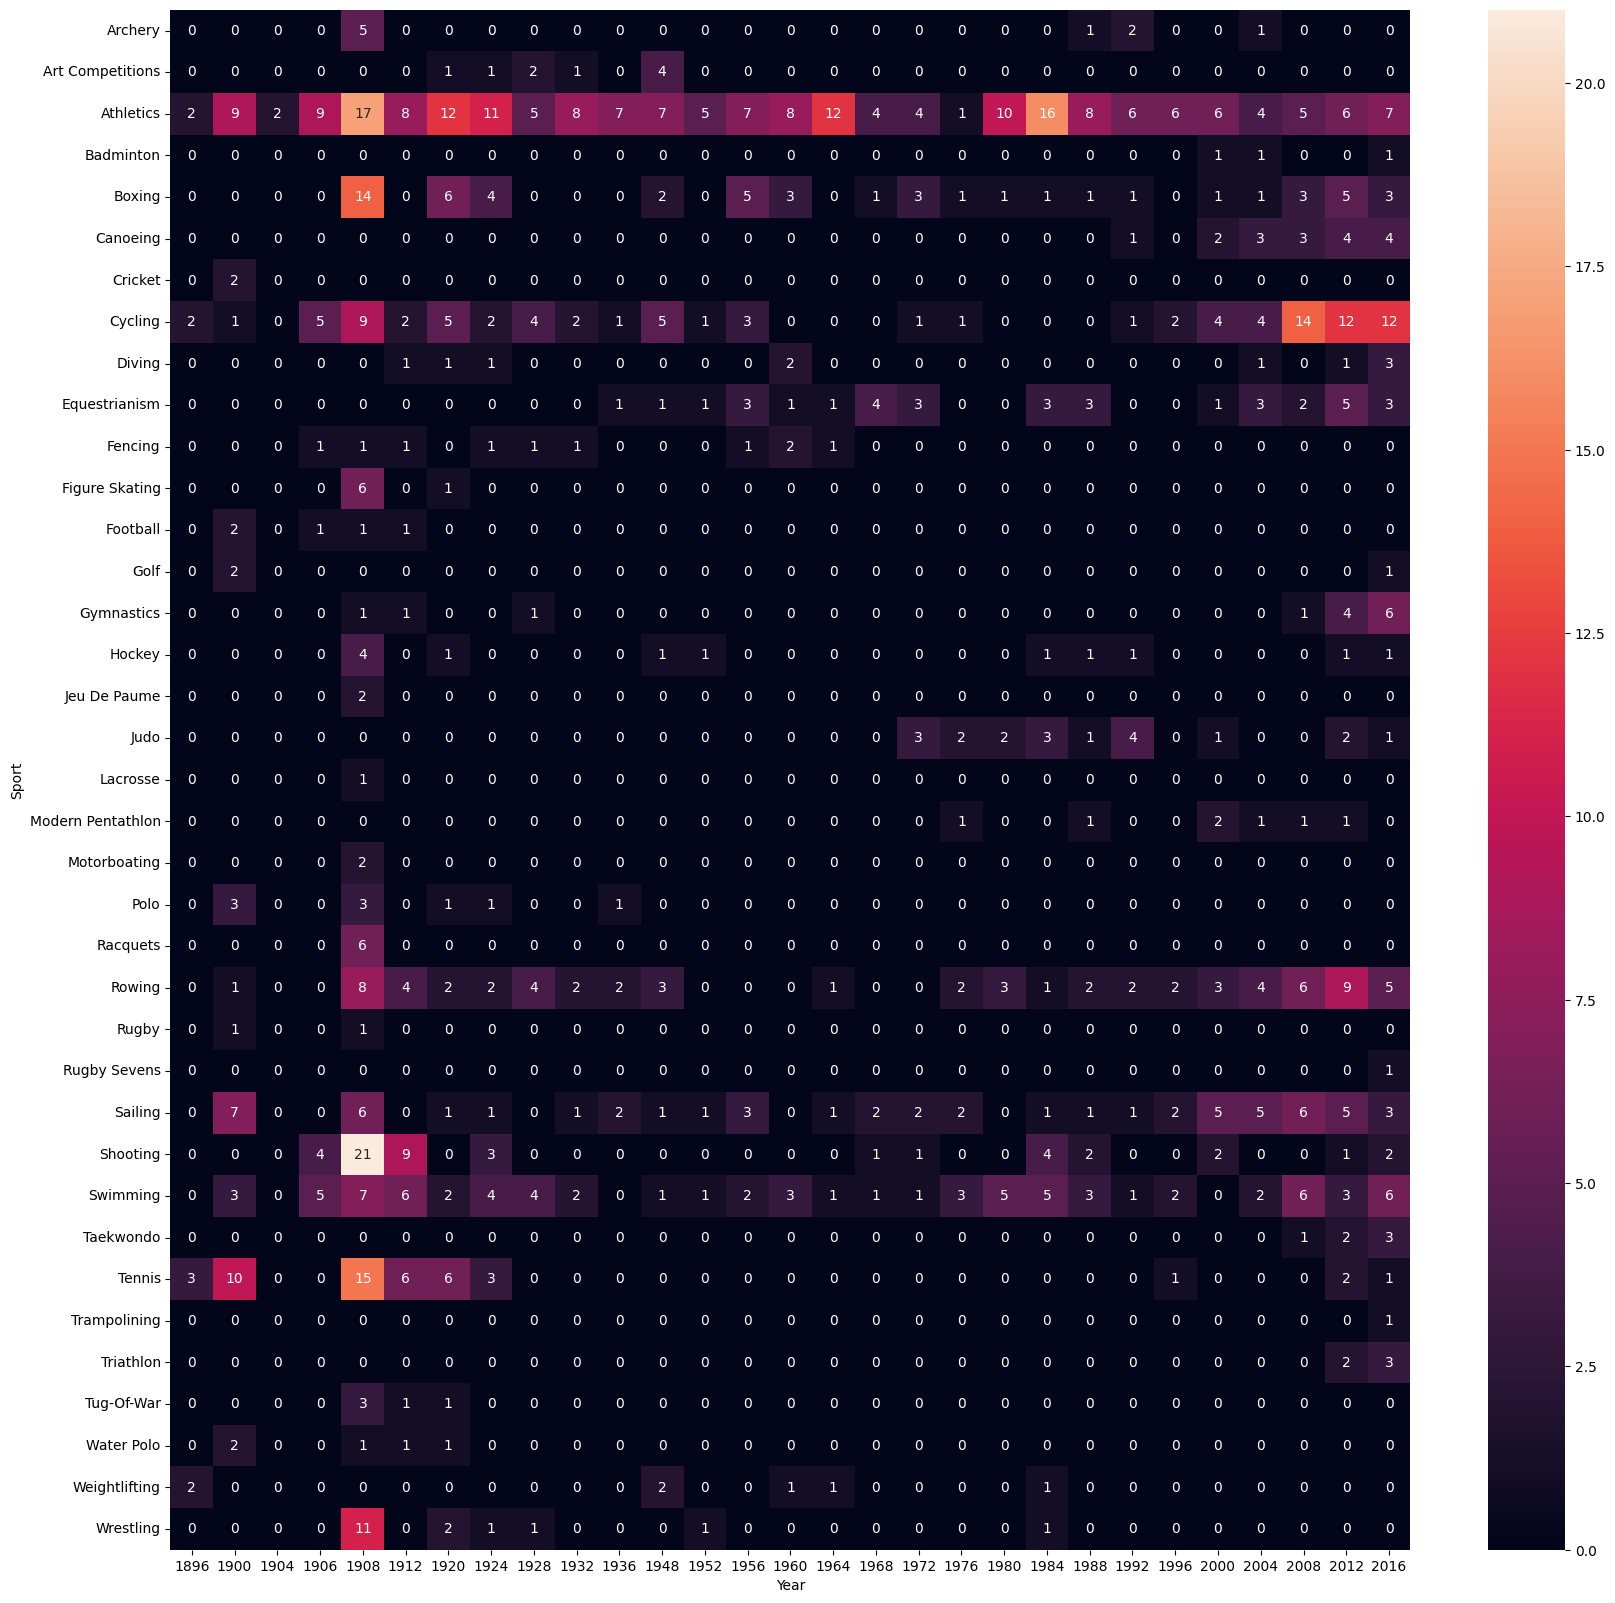

In [161]:
new_df= temp_df[temp_df['region']=='UK']
plt.figure(figsize=(20,20))
sns.heatmap(new_df.pivot_table(index='Sport', columns='Year', values='Medal', aggfunc='count').fillna(0),annot=True)

In [162]:
def most_successful(df, country):
    temp_df = df.dropna(subset=["Medal"])
    temp_df = temp_df[temp_df['region'] == country]
    x = temp_df['Name'].value_counts().reset_index().head(15).merge(df, how='left')[
        ['Name', 'count', 'Sport']].drop_duplicates('Name')
    x.rename(columns={'count': 'Medals'}, inplace=True)
    return x

In [163]:
most_successful(df,'India')

,Name,Medals,Sport
0,Udham Singh Kular,4,Hockey
4,Leslie Walter Claudius,4,Hockey
8,Shankar Pillay Laxman,3,Hockey
11,Ranganathan Francis,3,Hockey
14,Richard James Allen,3,Hockey
17,Balbir Singh,3,Hockey
20,Harbinder Singh Chimni,3,Hockey
23,"Balbir Singh Dosanjh, Sr.",3,Hockey
26,"Victor John ""V. J."" Peter",3,Hockey
29,Dhyan Chand Bais,3,Hockey


## Athletes Wise analysis

In [164]:
import plotly.figure_factory as ff

In [166]:
athletes_df= df.drop_duplicates(subset=['Name','region'])

In [175]:
athletes_df['Age'].dropna(inplace=True)

In [179]:
x1= athletes_df['Age'].dropna()
x2= athletes_df[athletes_df['Medal']=='Gold']['Age'].dropna()
x3= athletes_df[athletes_df['Medal']=='Silver']['Age'].dropna()
x4= athletes_df[athletes_df['Medal']=='Bronze']['Age'].dropna()


In [181]:
fig = ff.create_distplot([x1, x2, x3, x4], ['Overall Age', 'Gold Medalist', 'Silver Medalist', 'Bronze Medalist'],
                          show_hist=False, show_rug=False, bin_size=5)
fig.show()

#### Age vs Sports

In [184]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN,0,0,0
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN,0,0,0
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0


In [ ]:
famous_sport= df['Sport'].unique().tolist()

In [190]:
x=[]
name=[]

for sport in famous_sport:
    temp_df= athletes_df[athletes_df['Sport']==sport]
    x.append(temp_df[temp_df['Medal']=='Gold']['Age'].dropna())
    name.append(sport)

In [ ]:
if x:  # Check if x is not empty
        fig = px.histogram(x, facet_col=name, nbins=20, labels={'value': 'Age'})

In [193]:
famous_sport

['Basketball',
 'Judo',
 'Football',
 'Tug-Of-War',
 'Athletics',
 'Swimming',
 'Badminton',
 'Sailing',
 'Gymnastics',
 'Art Competitions',
 'Handball',
 'Weightlifting',
 'Wrestling',
 'Water Polo',
 'Hockey',
 'Rowing',
 'Fencing',
 'Equestrianism',
 'Shooting',
 'Boxing',
 'Taekwondo',
 'Cycling',
 'Diving',
 'Canoeing',
 'Tennis',
 'Modern Pentathlon',
 'Golf',
 'Softball',
 'Archery',
 'Volleyball',
 'Synchronized Swimming',
 'Table Tennis',
 'Baseball',
 'Rhythmic Gymnastics',
 'Rugby Sevens',
 'Trampolining',
 'Beach Volleyball',
 'Triathlon',
 'Rugby',
 'Lacrosse',
 'Polo',
 'Cricket',
 'Ice Hockey',
 'Racquets',
 'Motorboating',
 'Croquet',
 'Figure Skating',
 'Jeu De Paume',
 'Roque',
 'Basque Pelota',
 'Alpinism',
 'Aeronautics']

### Height vs Age of athletes 

In [196]:
athletes_df['Medal'].fillna('No Medal', inplace=True)

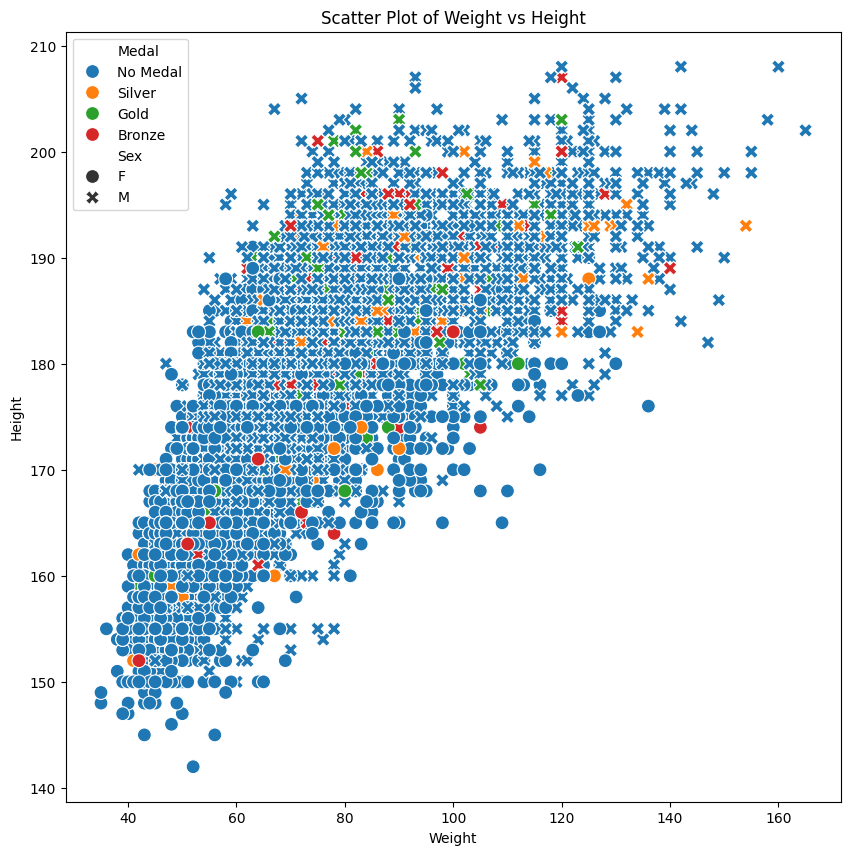

In [204]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
temp_df= athletes_df[athletes_df['Sport']=='Athletics']
sns.scatterplot(x=temp_df['Weight'], y=temp_df['Height'], hue= temp_df['Medal'], style= temp_df['Sex'], s=100)
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Scatter Plot of Weight vs Height')
plt.show()


### Men vs Women participation over the years

In [209]:
men= athletes_df[athletes_df['Sex']=='M'].groupby('Year').count()['Name'].reset_index()
women= athletes_df[athletes_df['Sex']=='F'].groupby('Year').count()['Name'].reset_index()

In [213]:
final= men.merge(women, on='Year', how='left')


In [215]:
final.fillna(0, inplace=True)
final

,Year,Name_x,Name_y
0,1896,174,0.0
1,1900,1181,23.0
2,1904,629,6.0
3,1906,759,6.0
4,1908,1772,44.0
5,1912,1978,53.0
6,1920,2280,73.0
7,1924,2535,132.0
8,1928,2342,285.0
9,1932,1382,162.0


In [217]:
final.rename(columns={'Name_x':"Male", "Name_y":'Female'}, inplace=True)
final.head()

,Year,Male,Female
0,1896,174,0.0
1,1900,1181,23.0
2,1904,629,6.0
3,1906,759,6.0
4,1908,1772,44.0


In [218]:
fig= px.line(final, x="Year", y=["Male","Female"])
fig.show()